# Timber Harvesting -- using cubic splines

**Randall Romero Aguilar, PhD**

This demo is based on the original Matlab demo accompanying the  <a href="https://mitpress.mit.edu/books/applied-computational-economics-and-finance">Computational Economics and Finance</a> 2001 textbook by Mario Miranda and Paul Fackler.

Original (Matlab) CompEcon file: **demdp01b.m**

Running this file requires the Python version of CompEcon. This can be installed with pip by running

    !pip install compecon --upgrade

<i>Last updated: 2021-Oct-01</i>
<hr>

## About

Profit maximizing owner of a commercial tree stand must decide when to clearcut the stand.


In [1]:
import numpy as np
from compecon import NLP, demo, BasisSpline
import matplotlib.pyplot as plt

In [2]:
price = 1.0  # price of biomass
kappa = 0.2  # clearcut-replant cost
smax  = 0.5  # stand carrying capacity
gamma = 0.1  # biomass growth parameter
delta = 0.9  # discount factor

### Code the growth function

In [3]:
def h(s): return np.array(s + gamma*(smax - s))

## SOLUTION

### Code the approximant and the residual

In [4]:
ns = 200
vhat = BasisSpline(ns,0,smax,k=3)

In [5]:
def vhat1(s): return price*s - kappa + delta * vhat(h(0))
def vhat0(s): return delta * vhat(h(s))

In [6]:
def resid(c,s=vhat.nodes):
    vhat.c = c
    return vhat(s) - np.maximum(vhat0(s), vhat1(s))

### Solve collocation equation

In [7]:
cc = NLP(resid).broyden(vhat.c)

### Compute critical biomass

In [8]:
scrit = NLP(lambda s: vhat0(s)-vhat1(s)).broyden(0.0)[0]

## ANALYSIS

### Compute refined state grid

In [9]:
ss = np.linspace(0,smax,1000)

### Plot Conditional Value Functions

Optimal Biomass Harvest Level = 0.3067


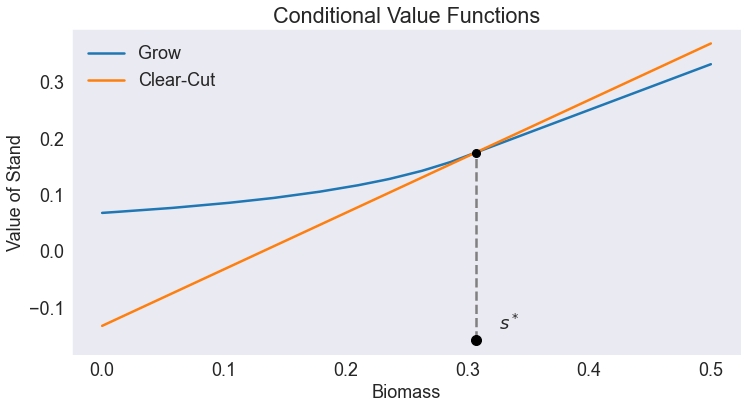

In [10]:
fig1 =demo.figure('Conditional Value Functions','Biomass','Value of Stand')
plt.plot(ss,vhat0(ss),label='Grow')
plt.plot(ss,vhat1(ss),label='Clear-Cut')
plt.legend()

vcrit = vhat(scrit)
ymin = plt.ylim()[0]
plt.vlines(scrit, ymin,vcrit,'grey',linestyles='--')
demo.annotate(scrit,ymin,'$s^*$',ms=10)
demo.bullet(scrit,vcrit)
print(f'Optimal Biomass Harvest Level = {scrit:.4f}') 

### Plot Value Function Residual

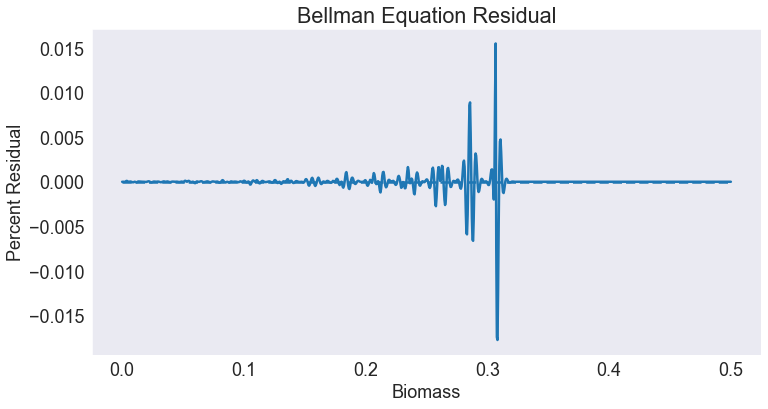

In [11]:
fig2 = demo.figure('Bellman Equation Residual', 'Biomass', 'Percent Residual')
plt.plot(ss, 100*resid(cc,ss) / vhat(ss))
plt.hlines(0,0,smax,linestyles='--')

### Compute ergodic mean annual harvest 

In [12]:
s = h(0)
for n in range(100):
    if s > scrit: break
    s = h(s)
    
print(f'Ergodic Mean Annual Harvest = {s/n:.4f} after {n+1} iterations') 

Ergodic Mean Annual Harvest = 0.0362 after 10 iterations


In [13]:
#demo.savefig([fig1,fig2])